<a href="https://colab.research.google.com/github/jogong2718/COVID-19-Radiography-Models/blob/main/GitHub_CWSF_Apply_CAM_and_Confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = +3>APPLY CAM

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import imageio as iio
import cv2 as cv
import pickle
from natsort import natsorted
import random
from PIL import Image
from IPython.display import Image, display
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("your_data_link") #change to where your model path is
pth = 'your_classifcation_model.h5'

In [ ]:
%%time
model = tf.keras.models.load_model(pth)

CPU times: user 12.9 s, sys: 745 ms, total: 13.6 s
Wall time: 15.8 s


In [ ]:
last_conv_layer_name = "your_conv_layer"

grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(last_conv_layer_name).output]
)

In [ ]:
def gives_conv_output(img_array):
  last_conv_layer_output = grad_model(img_array.reshape((1, 128, 128, 3)))
  last_conv_layer_output = np.asarray(last_conv_layer_output)
  return last_conv_layer_output

In [ ]:
def give_heatmap(last_conv_layer_output):
  margin = 0
  w, h = 128, 128
  last_conv_layer_output = np.asarray(last_conv_layer_output).reshape((29, 29))
  last_conv_layer_output = cv2.resize(last_conv_layer_output, (w, h))
  heatmap = np.zeros((w, h))
  heatmap[margin:(w-margin), margin:(h-margin)] = np.round((last_conv_layer_output[margin:(w-margin), margin:(h-margin)]), 1)
  return heatmap

In [ ]:
def give_simple_heatmap(last_conv_layer_output, threshold_i):
  threshold = threshold_i
  margin = 0
  w, h = 128, 128
  last_conv_layer_output = np.asarray(last_conv_layer_output).reshape((29, 29))
  last_conv_layer_output = cv2.resize(last_conv_layer_output, (w, h))
  heatmap = np.zeros((w, h))
  heatmap[margin:(w-margin), margin:(h-margin)] = (last_conv_layer_output[margin:(w-margin), margin:(h-margin)] > threshold)
  return heatmap

In [ ]:
y_pred = model.predict([test_data, test_data])[1]

In [ ]:
predictions = y_pred

# list of predictions
list_of_pred_conf = []

predicted_classes = np.argmax(predictions, axis=1)

# Get the confidence (probability) of each predicted class
confidences = np.max(predictions, axis=1)

# Print the predicted classes and their confidences
for i, prediction in enumerate(predictions):
  temp_array_lol = []
  print(f"Prediction {i}:")
  temp_array_lol.append(f"Prediction {i}:")
  for j, confidence in enumerate(prediction):
    temp = [0, 1, 2]
    temp1 = ["Covid", "Normal", "Pneumonia"]
    word = temp1[temp.index(j)]
    print(f"Confidence = {confidence:.6f}" + " of the prediction being " + word)
    temp_array_lol.append(f"Confidence = {confidence:.6f}" + " of the prediction being " + word)
  list_of_pred_conf.append(temp_array_lol)
  



42
actual value: Pneumonia
predicted value: Pneumonia
Confidence = 0.000034 of the prediction being Covid
Confidence = 0.000139 of the prediction being Normal
Confidence = 0.999827 of the prediction being Pneumonia


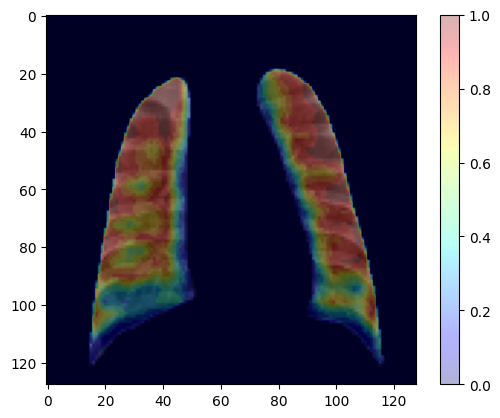

In [ ]:
i = int(input()) #covid: 14, 1, 28 pneumonia: 16, 32, 42!!!, 44!, 63           48 sus

heatmap = give_heatmap(gives_conv_output(test_data[i]))
heatmap = heatmap * everything[1][i] / 255 # cropping



plt.imshow(test_data[i], cmap='binary')
plt.imshow(heatmap, cmap='jet', alpha=0.3)
plt.colorbar()

if np.argmax(everything[2][i]) == 0:
  print("actual value: Covid")

if np.argmax(everything[2][i]) == 1:
  print("actual value: Normal")

if np.argmax(everything[2][i]) == 2:
  print("actual value: Pneumonia")

if np.argmax(y_pred[i]) == 0:
  print("predicted value: Covid")

if np.argmax(y_pred[i]) == 1:
  print("predicted value: Normal")

if np.argmax(y_pred[i]) == 2:
  print("predicted value: Pneumonia")

print(list_of_pred_conf[i][1])
print(list_of_pred_conf[i][2])
print(list_of_pred_conf[i][3])

42
actual value: Pneumonia
predicted value: Pneumonia
Confidence = 0.000034 of the prediction being Covid
Confidence = 0.000139 of the prediction being Normal
Confidence = 0.999827 of the prediction being Pneumonia
The threshold: 0.999


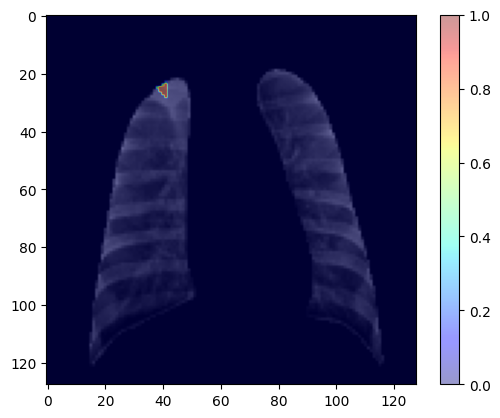

In [ ]:
i = int(input()) #covid: 14, 1, 28 pneumonia: 16, 32, 42!!!, 44!, 63           48 sus
dathreshold = 0.999
heatmap = give_boring_heatmap(gives_conv_output(test_data[i]), dathreshold)
heatmap = heatmap * everything[1][i] / 255 # cropping



plt.imshow(test_data[i], cmap='binary')
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.colorbar()

if np.argmax(everything[2][i]) == 0:
  print("actual value: Covid")

if np.argmax(everything[2][i]) == 1:
  print("actual value: Normal")

if np.argmax(everything[2][i]) == 2:
  print("actual value: Pneumonia")

if np.argmax(y_pred[i]) == 0:
  print("predicted value: Covid")

if np.argmax(y_pred[i]) == 1:
  print("predicted value: Normal")

if np.argmax(y_pred[i]) == 2:
  print("predicted value: Pneumonia")

print(list_of_pred_conf[i][1])
print(list_of_pred_conf[i][2])
print(list_of_pred_conf[i][3])
print("The threshold: " + str(dathreshold))

In [ ]:
the_wrong = []
for i in range(807):
  if np.argmax(everything[2][i]) != np.argmax(y_pred[i]):
    the_wrong.append(i)

In [ ]:
the_right = []
for i in range(807):
  if np.argmax(everything[2][i]) == np.argmax(y_pred[i]):
    the_right.append(i)

In [ ]:
mean_wrong = []
for i in the_wrong:
  mean_wrong.append(float((max(list_of_pred_conf[i][1], list_of_pred_conf[i][2], list_of_pred_conf[i][3])).split(" ")[2]))
print(sum(mean_wrong)/len(mean_wrong))

0.9537775238095241


In [ ]:
mean_wrong

[0.891447,
 0.999309,
 0.999568,
 0.740666,
 0.997997,
 0.999982,
 0.999926,
 0.999889,
 0.999927,
 0.966186,
 0.999966,
 0.775686,
 0.983016,
 1.0,
 0.953428,
 0.753534,
 0.999994,
 0.999898,
 0.976158,
 0.997413,
 0.995338]

In [ ]:
mean_right = []
for i in the_right:
  mean_right.append(float((max(list_of_pred_conf[i][1], list_of_pred_conf[i][2], list_of_pred_conf[i][3])).split(" ")[2]))
print(sum(mean_right)/len(mean_right))

0.9943997391857525
